In [1]:
import pandas as pd
import datetime as dt

# Pretty plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['legend.title_fontsize'] = 12

# Pandas settings
pd.options.display.max_colwidth = 100
pd.options.display.max_columns = 100

# Project imports 
from self_harm_triage_notes.config import interim_data_dir, results_dir

# Toolbox imports
from ml_health_toolbox.dataset_utils import get_categorical_dtype, make_categorical

___
# LVRH ED presentations

In [2]:
# Load data
lvrh = pd.read_parquet(interim_data_dir / "lvrh_2012_2022.parquet", engine="pyarrow")
lvrh = lvrh[lvrh.year < 2022].copy()
lvrh

,uid,sex,age,arrival_mode,arrival_date,year,triage_note,SH,SI,AOD_OD,SI_or_SH,audit_case
0,LVRH2-2012-1,Male,2,"OTHER (INCLUDES PRIVATE CAR, WALKED)",2012-01-01 00:06:00,2012,PT FELL OVER WHILST OUT CAMPING AT APPROX 2200HRS ONTO ?BROKEN GLASS. PT REFUSED PANADOL BY PARE...,Not self-harm,Not suicidal ideation,Not overdose,0,0
1,LVRH2-2012-2,Female,53,"OTHER (INCLUDES PRIVATE CAR, WALKED)",2012-01-01 00:30:00,2012,PT PRESENTS WITH ?SOMETHING IN HER LEFT EYE. PT WAS AT HOME WHEN LEFT EYE BECAME ITCHY AT APPROX...,Not self-harm,Not suicidal ideation,Not overdose,0,0
2,LVRH2-2012-3,Male,24,ROAD AMBULANCE SERVICE,2012-01-01 00:56:00,2012,BIBA POST WITTNESSED ASSAULT APPROX 2330HRS. HIT IN LEFT SIDE OF FACE AND HAD LOC ?LENGHT OF TIM...,Not self-harm,Not suicidal ideation,Not overdose,0,0
3,LVRH2-2012-4,Male,21,"OTHER (INCLUDES PRIVATE CAR, WALKED)",2012-01-01 01:07:00,2012,"PAST WEEK HAS BEEN SMOKING MARIJUANA. 2/7 EAR ACHES , SORE THROAT AND HEADACHE . TODAY RASH ON L...",Not self-harm,Not suicidal ideation,Not overdose,0,0
4,LVRH2-2012-5,Male,3,"OTHER (INCLUDES PRIVATE CAR, WALKED)",2012-01-01 01:12:00,2012,BIB FATHER WITH PAINFUL AND SWOLLEN PENIS. PT HAS BEEN AT BEACH TODAY AND AT APPROX 1500HRS STAR...,Not self-harm,Not suicidal ideation,Not overdose,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359627,LVRH2-2021-42233,Female,29,Other,2021-12-31 22:41:00,2021,L) achilles injury \n2230hrs was in kitchen and has slipped with her crutches and has landed har...,Not self-harm,Not suicidal ideation,Not overdose,0,0
359628,LVRH2-2021-42234,Male,40,Road ambulance service,2021-12-31 22:55:00,2021,"Altered LOC & vomiting \nPt triaged in Resus 4 with EDCIC _x000D_\nPt GCS 13-14 alert, talking ?...",Not self-harm,Not suicidal ideation,Not overdose,0,0
359629,LVRH2-2021-42235,Male,37,Other,2021-12-31 23:19:00,2021,L) jaw pain & numbness \nL) lower pain for 4-5/7 - saw dentist 2/7 ago -states infected area inc...,Not self-harm,Not suicidal ideation,Not overdose,0,0
359630,LVRH2-2021-42236,Female,42,Other,2021-12-31 23:30:00,2021,Headstrike & LOC \nBIB husband _x000D_\nSlipped and fell in bathroom ~2315 headstrike on baby ga...,Not self-harm,Not suicidal ideation,Not overdose,0,0


## General info

In [3]:
lvrh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 359632 entries, 0 to 359631
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   uid           359632 non-null  object        
 1   sex           359632 non-null  object        
 2   age           359632 non-null  int64         
 3   arrival_mode  359632 non-null  object        
 4   arrival_date  359632 non-null  datetime64[ns]
 5   year          359632 non-null  int64         
 6   triage_note   359632 non-null  object        
 7   SH            359632 non-null  category      
 8   SI            359632 non-null  category      
 9   AOD_OD        359632 non-null  category      
 10  SI_or_SH      359632 non-null  int64         
 11  audit_case    359632 non-null  int64         
dtypes: category(3), datetime64[ns](1), int64(4), object(4)
memory usage: 28.5+ MB


In [4]:
lvrh.isna().sum()

uid             0
sex             0
age             0
arrival_mode    0
arrival_date    0
year            0
triage_note     0
SH              0
SI              0
AOD_OD          0
SI_or_SH        0
audit_case      0
dtype: int64

In [5]:
lvrh.nunique()

uid             359632
sex                  4
age                108
arrival_mode        16
arrival_date    351004
year                10
triage_note     358744
SH                   2
SI                   2
AOD_OD               2
SI_or_SH             2
audit_case           2
dtype: int64

## Data checks

In [6]:
# Check the year was extracted correctly
assert (lvrh.arrival_date.dt.year == lvrh.year).all()

In [7]:
# Empty triage notes
print("The dataset contains %d presentations with empty triage notes." % 
      lvrh.triage_note.isna().sum())
# Triage note containing only "\n"
print("The dataset contains %d presentations containing only newline." % 
      (lvrh.triage_note.str.lower()==" \n").sum())
# Triage note stating "as above"
print("The dataset contains %d presentations stating \"as above\"." % 
      (lvrh.triage_note.str.lower()=="as above").sum())

The dataset contains 0 presentations with empty triage notes.
The dataset contains 66 presentations containing only newline.
The dataset contains 0 presentations stating "as above".


### Number of presentations over time

In [8]:
# Expected range of dates
count_per_day = pd.DataFrame(index=pd.date_range(start='2012-01-01',end='2022-06-30'))
count_per_day['count'] = 0
# Update with actual counts
count_per_day.update({'count': lvrh.groupby(lvrh.arrival_date.dt.date).size()})

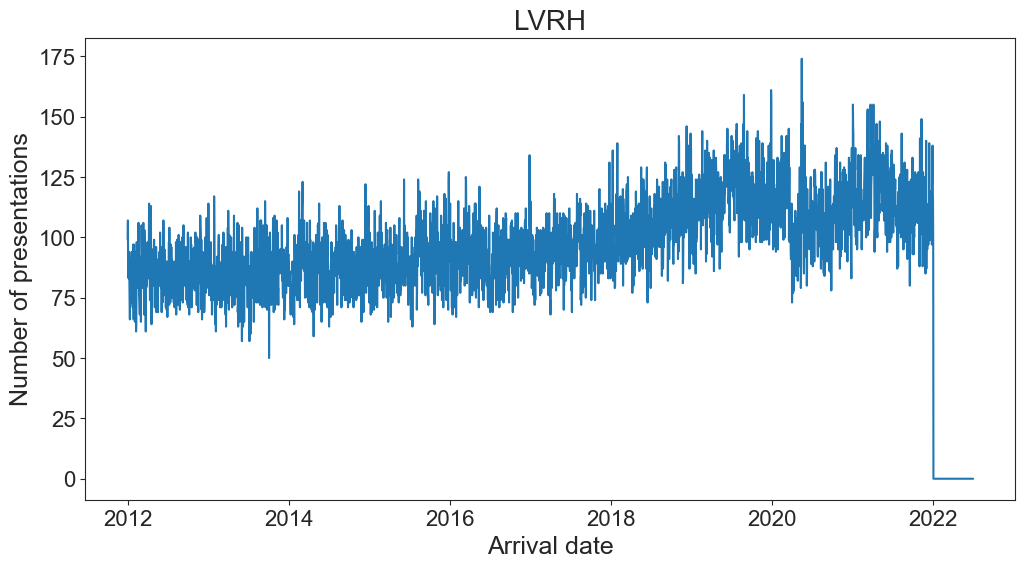

In [9]:
plt.rcParams['figure.figsize'] = (12, 6)

sns.lineplot(x=count_per_day.index,
             y=count_per_day['count']);

plt.xlabel("Arrival date");
plt.ylabel("Number of presentations");
plt.title("LVRH");
plt.savefig("../results/LVRH number of presentations.jpeg", dpi=300, pad_inches=0);

In [10]:
lvrh.arrival_date.dt.date.value_counts().tail(10)

arrival_date
2013-05-16    63
2013-07-12    62
2012-02-08    61
2012-03-23    61
2013-02-04    61
2013-07-11    60
2014-04-23    59
2013-06-02    57
2013-07-06    57
2013-10-03    50
Name: count, dtype: int64

In [11]:
# Data missing between 22 Dec 2015 and 31 Dec 2015 inclusive
lvrh[(lvrh.arrival_date.dt.date >= dt.date(2015, 12, 15)) & 
   (lvrh.arrival_date.dt.date <= dt.date(2016, 1, 5))].arrival_date.dt.date.value_counts().sort_index()

arrival_date
2015-12-15     92
2015-12-16     74
2015-12-17     87
2015-12-18     81
2015-12-19     90
2015-12-20     91
2015-12-21    105
2015-12-22    105
2015-12-23     74
2015-12-24     70
2015-12-25     88
2015-12-26    123
2015-12-27    127
2015-12-28    112
2015-12-29    101
2015-12-30    102
2015-12-31     90
2016-01-01    106
2016-01-02    114
2016-01-03     95
2016-01-04     99
2016-01-05     78
Name: count, dtype: int64

In [12]:
# Lower than usual number of cases on 28-29 Jun 2019
lvrh[(lvrh.arrival_date.dt.date >= dt.date(2019, 6, 25)) & 
   (lvrh.arrival_date.dt.date <= dt.date(2019, 7, 5))].arrival_date.dt.date.value_counts().sort_index()

arrival_date
2019-06-25    119
2019-06-26    119
2019-06-27    132
2019-06-28    128
2019-06-29    132
2019-06-30    121
2019-07-01    142
2019-07-02    120
2019-07-03    134
2019-07-04    132
2019-07-05    127
Name: count, dtype: int64

In [13]:
# Lower than usual number of cases on 24 Aug 2021
lvrh[(lvrh.arrival_date.dt.date >= dt.date(2021, 8, 20)) & 
   (lvrh.arrival_date.dt.date <= dt.date(2021, 8, 30))].arrival_date.dt.date.value_counts().sort_index()

arrival_date
2021-08-20    112
2021-08-21    122
2021-08-22    111
2021-08-23    131
2021-08-24     98
2021-08-25    108
2021-08-26    115
2021-08-27    103
2021-08-28    105
2021-08-29    111
2021-08-30    122
Name: count, dtype: int64

In [14]:
lvrh.arrival_date.dt.date.value_counts().head(10)

arrival_date
2020-05-14    174
2019-12-27    161
2019-08-26    159
2020-05-18    156
2019-12-28    156
2021-03-22    155
2021-04-04    155
2021-01-01    155
2021-03-09    153
2021-03-08    152
Name: count, dtype: int64

In [15]:
# Higher than usual number of cases on 21 Nov 2016
lvrh[(lvrh.arrival_date.dt.date >= dt.date(2016, 11, 15)) & 
   (lvrh.arrival_date.dt.date <= dt.date(2016, 11, 30))].arrival_date.dt.date.value_counts().sort_index()

arrival_date
2016-11-15     88
2016-11-16    101
2016-11-17     98
2016-11-18     82
2016-11-19     91
2016-11-20    104
2016-11-21     98
2016-11-22     96
2016-11-23     85
2016-11-24     96
2016-11-25     87
2016-11-26     85
2016-11-27     83
2016-11-28     95
2016-11-29     95
2016-11-30    103
Name: count, dtype: int64

In [16]:
count_per_day[count_per_day['count'] >= 400]

,count


### Annotations

In [17]:
# Check for confusion between SH, SI, and AOD OD
print("Number of presentations annotated as both SH and SI:", ((lvrh.SH.cat.codes == 1) & (lvrh.SI.cat.codes == 1)).sum())
print("Number of presentations annotated as both SH and AOD OD:", ((lvrh.SH.cat.codes == 1) & (lvrh.AOD_OD.cat.codes == 1)).sum())
print("Number of presentations annotated as both SI and AOD OD:", ((lvrh.SI.cat.codes == 1) & (lvrh.AOD_OD.cat.codes == 1)).sum())

Number of presentations annotated as both SH and SI: 2
Number of presentations annotated as both SH and AOD OD: 0
Number of presentations annotated as both SI and AOD OD: 0


In [18]:
# Patients under the age of 9 with positive labels
print("Number of presentation annotated as SH from patients under the age of 9:", ((lvrh.SH.cat.codes == 1) & (lvrh.age<9)).sum())
print("Number of presentation annotated as SI from patients under the age of 9:", ((lvrh.SI.cat.codes == 1) & (lvrh.age<9)).sum())
print("Number of presentation annotated as AOD from patients under the age of 9:", ((lvrh.AOD_OD.cat.codes == 1) & (lvrh.age<9)).sum())

Number of presentation annotated as SH from patients under the age of 9: 25
Number of presentation annotated as SI from patients under the age of 9: 9
Number of presentation annotated as AOD from patients under the age of 9: 0


## Normalise data

### Sex

In [19]:
lvrh.sex.value_counts(dropna=False)

sex
Female           183588
Male             176041
-                     2
Indeterminate         1
Name: count, dtype: int64

In [20]:
# Normalise sex variable to 4 values (LVRH)
lvrh.sex = lvrh.sex.str.lower()
lvrh.loc[lvrh.sex.isin(["indeterminate"]), 'sex'] = "intersex"
lvrh.loc[~lvrh.sex.isin(["female", "male", "intersex"]), 'sex'] = "unknown"

categories = ["female", "male", "intersex", "unknown"]
categorical_dtype, _ = get_categorical_dtype(categories=categories)
lvrh.sex = make_categorical(lvrh.sex, categorical_dtype)

### Arrival method

In [21]:
lvrh.arrival_mode.value_counts(dropna=False).head(15)

arrival_mode
OTHER (INCLUDES PRIVATE CAR, WALKED)                                                                175915
Other                                                                                                81200
ROAD AMBULANCE SERVICE                                                                               64773
Road ambulance service                                                                               30719
AMBULANCE SERVICE - PRIV AMB CAR - HOSPITAL CONTRACTED                                                2291
Ambulance service- private ambulance car- hospital contracted                                         2164
POLICE VEHICLE                                                                                        1302
Ambulance service- private ambulance car- MAS/RAV contracted                                           613
Police vehicle                                                                                         288
-                       

In [22]:
def normalise_arrival_mode(x):
    # Convert to lowercase
    x = x.str.lower()
    # Replace string values
    x.loc[x.fillna("").str.contains("community|self|walk-in|walked|public transport")] = "self/community/pt"
    x.loc[x.fillna("").str.contains("road ambulance")] = "road ambulance"
    x.loc[x.fillna("").str.contains("private|priv")] = "private ambulance"
    x.loc[x.fillna("").str.contains("air|helicopter")] = "air ambulance"
    x.loc[x.fillna("").str.contains("police")] = "police"
    x.loc[x.fillna("").str.contains("undertaker")] = "undertaker"
    x.loc[x.fillna("").str.contains("other")] = "other"
    
    categories = ['self/community/pt', 'road ambulance', 'private ambulance', 'air ambulance', 'police', 'undertaker', 'other']
    categorical_dtype, _ = get_categorical_dtype(categories=categories)
    x = make_categorical(x, categorical_dtype)
    
    return x

# Normalise arrival method variable
lvrh.arrival_mode = normalise_arrival_mode(lvrh.arrival_mode)

In [23]:
lvrh.arrival_mode.value_counts(dropna=False)

arrival_mode
self/community/pt    175948
road ambulance        95492
other                 81200
private ambulance      5068
police                 1590
air ambulance           237
NaN                      97
undertaker                0
Name: count, dtype: int64

### Triage notes

In [24]:
# Replace single newline with empty string
lvrh.loc[lvrh.triage_note.str.lower()==" \n", 'triage_note'] = ""

### Annotations

In [25]:
lvrh.SH.cat.categories, lvrh.SI.cat.categories, lvrh.AOD_OD.cat.categories

(Index(['Not self-harm', 'Self-harm'], dtype='object'),
 Index(['Not suicidal ideation', 'Suicidal ideation'], dtype='object'),
 Index(['Not overdose', 'Overdose'], dtype='object'))

In [26]:
# Fix annotation errors
# Two records annotated as both self-harm and Suicidal ideation overdose
lvrh.loc[(lvrh.SH.cat.codes==1) & (lvrh.SI.cat.codes==1), 'SH'] = "Not self-harm"

# 28 patients aged <9 positive for SH
lvrh.loc[(lvrh.age<9) & (lvrh.SH.cat.codes==1), 'SH'] = "Not self-harm"

# 9 patients aged <9 positive for SI
lvrh.loc[(lvrh.age<9) & (lvrh.SI.cat.codes==1), 'SI'] = "Not suicidal ideation"

### Additional columns

In [27]:
# Create new column that contains quarter
lvrh['quarter'] = lvrh.arrival_date.dt.to_period('Q')

# Triage note length
lvrh['length'] = lvrh.triage_note.apply(len)

### Number of patients per year

In [29]:
lvrh.year.value_counts().sort_index().agg(['mean', 'std'])

mean    35963.200000
std      4612.912765
Name: count, dtype: float64

### Remove patients below the age of 9

In [30]:
# Remove presentations of patients under the age of 9
print("Removing %d presentations of patients under the age of 9." % (lvrh.age < 9).sum())
lvrh = lvrh[lvrh.age >= 9].copy()
lvrh.reset_index(drop=True, inplace=True)
lvrh.shape

Removing 42755 presentations of patients under the age of 9.


(316877, 14)

### Missing data

In [31]:
lvrh.isna().sum()

uid              0
sex              0
age              0
arrival_mode    89
arrival_date     0
year             0
triage_note      0
SH               0
SI               0
AOD_OD           0
SI_or_SH         0
audit_case       0
quarter          0
length           0
dtype: int64

In [32]:
lvrh.sex.value_counts(dropna=False)

sex
female      164636
male        152238
unknown          2
intersex         1
Name: count, dtype: int64

In [33]:
lvrh.arrival_mode.value_counts(dropna=False)

arrival_mode
self/community/pt    147734
road ambulance        92344
other                 69850
private ambulance      5041
police                 1588
air ambulance           231
NaN                      89
undertaker                0
Name: count, dtype: int64

### Length

In [34]:
(lvrh.triage_note=="").sum( )

62

In [35]:
lvrh.length.agg(['mean', 'std'])

mean    277.157847
std     125.510570
Name: length, dtype: float64

### Save dataset

In [ ]:
lvrh.to_parquet(interim_data_dir / "lvrh_2012_2022_cleaned.parquet", engine="pyarrow")

___
# EDA

In [ ]:
# Remove 2022 (temporarily)
lvrh = lvrh[lvrh.year < 2022].copy()
lvrh.shape

### Number of presentations
**Per year**

In [ ]:
palette = {year: sns.color_palette('Blues')[1] for year in range(2012, 2018)}
palette.update({year: sns.color_palette('Blues')[3] for year in range(2018, 2022)})

sns.countplot(x='year', data=lvrh, hue='year', palette=palette, legend=False);
plt.xlabel("Arrival date");
plt.ylabel("ED presentations");
plt.title("LVRH");
plt.savefig(results_dir / "LVRH presentations per year.jpeg", bbox_inches='tight', dpi=300);

In [ ]:
lvrh.year.value_counts().agg(['mean', 'std']).round()

**Per quarter**

In [ ]:
lvrh.quarter.value_counts().agg(['mean', 'std']).round()

### Age

In [ ]:
lvrh.age.describe().round()

In [ ]:
sns.kdeplot(x='age', data=lvrh, fill=True);

### Sex

In [ ]:
lvrh.sex.value_counts(normalize=True)

### Arrival method

In [ ]:
lvrh.arrival_mode.value_counts(normalize=True)

### Length of triage notes

In [ ]:
lvrh.length.describe().round()

### SH and SI

In [ ]:
(lvrh.SH.value_counts(dropna=False, normalize=True) * 100).round(1)

In [ ]:
(lvrh.SI.value_counts(dropna=False, normalize=True) * 100).round(1)